# Hierarchical and K-means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_excel("C:/Users/dax98/OneDrive/Desktop/INFO 6105 - DSEM/Week4/play.xlsx")
df.head()

,Outlook,Temperature,Humidity,Windy,Decision
0,overcast,72,90,strong,play
1,overcast,83,78,weak,play
2,overcast,64,65,strong,play
3,overcast,81,75,weak,play
4,sunny,75,70,strong,play


In [3]:
df=pd.get_dummies(df)
df

,Temperature,Humidity,Outlook_overcast,Outlook_rain,Outlook_sunny,Windy_strong,Windy_weak,Decision_dont_play,Decision_play
0,72,90,1,0,0,1,0,0,1
1,83,78,1,0,0,0,1,0,1
2,64,65,1,0,0,1,0,0,1
3,81,75,1,0,0,0,1,0,1
4,75,70,0,0,1,1,0,0,1
5,80,90,0,0,1,1,0,1,0
6,85,85,0,0,1,0,1,1,0
7,72,95,0,0,1,0,1,1,0
8,69,70,0,0,1,0,1,0,1
9,71,80,0,1,0,1,0,1,0


# Play Hierarchical Clustering

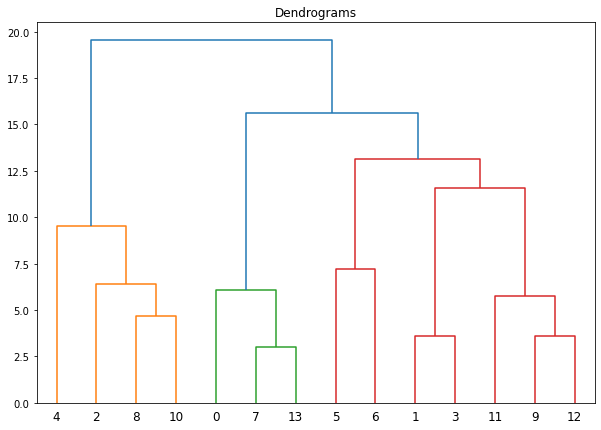

In [4]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='average'))

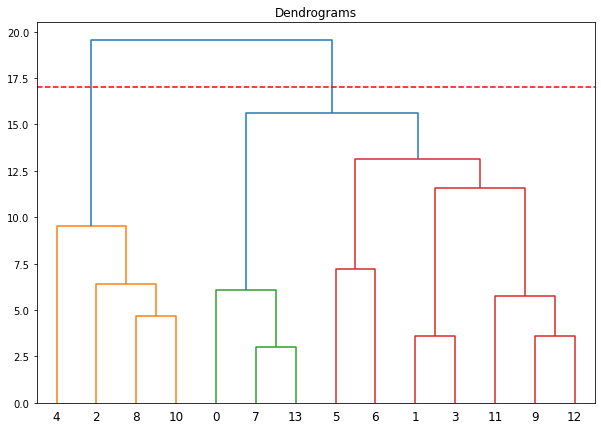

In [5]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='average'))
plt.axhline(y=17, color='r', linestyle='--')

In [6]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
cluster.fit_predict(df)

array([2, 0, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 2], dtype=int64)

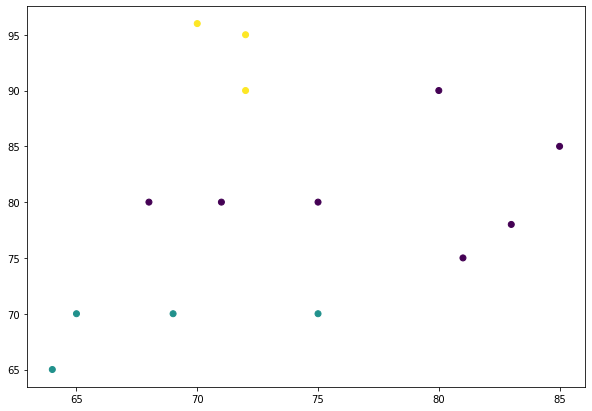

In [7]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['Temperature'], df['Humidity'], c=cluster.labels_) 

# K-means + Hierarchical Clustering

In [8]:
df=pd.read_excel("C:/Users/dax98/OneDrive/Desktop/INFO 6105 - DSEM/Week4/mydata.xlsx")
df.head()

C:\ProgramData\Anaconda3\envs\tf-gpu-cuda8\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
1,Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
2,Datsun 710,22.8,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
3,Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
4,Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0


In [9]:
from sklearn.cluster import KMeans

In [10]:
 X = df.iloc[:,1:12]

C:\ProgramData\Anaconda3\envs\tf-gpu-cuda8\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

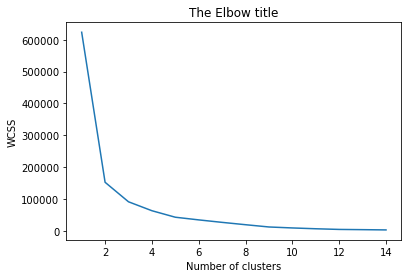

In [11]:
wcss=[]
for i in range(1,15):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,15)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [12]:
km = KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [13]:
y_predicted = km.fit_predict(df[['mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']])
y_predicted

array([4, 4, 1, 0, 0, 4, 3, 1, 1, 4, 4, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 0,
       0, 3, 2, 1, 1, 1, 3, 4, 3, 1])

In [14]:
df['cluster']=y_predicted
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cluster
0,Mazda RX4,21.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0,4
1,Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0,4
2,Datsun 710,22.8,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0,1
3,Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0,0
4,Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


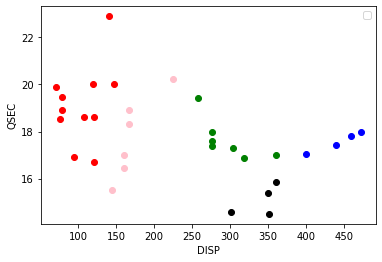

In [15]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
df3 = df[df.cluster==3]
df4 = df[df.cluster==4]

plt.scatter(df0.disp,df0['qsec'],color='green')
plt.scatter(df1.disp,df1['qsec'],color='red')
plt.scatter(df2.disp,df2['qsec'],color='blue')
plt.scatter(df3.disp,df3['qsec'],color='black')
plt.scatter(df4.disp,df4['qsec'],color='pink')

plt.xlabel('DISP')
plt.ylabel('QSEC')
plt.legend()


In [16]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [17]:
y_predicted = km.fit_predict(df[['mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']])
y_predicted

array([0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 2,
       2, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [18]:
df['cluster']=y_predicted
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cluster
0,Mazda RX4,21.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0,0
1,Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0,0
2,Datsun 710,22.8,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0,0
3,Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0,2
4,Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


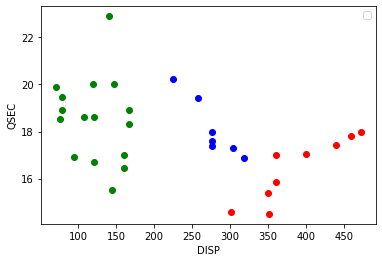

In [19]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]


plt.scatter(df0.disp,df0['qsec'],color='green')
plt.scatter(df1.disp,df1['qsec'],color='red')
plt.scatter(df2.disp,df2['qsec'],color='blue')

plt.xlabel('DISP')
plt.ylabel('QSEC')
plt.legend()


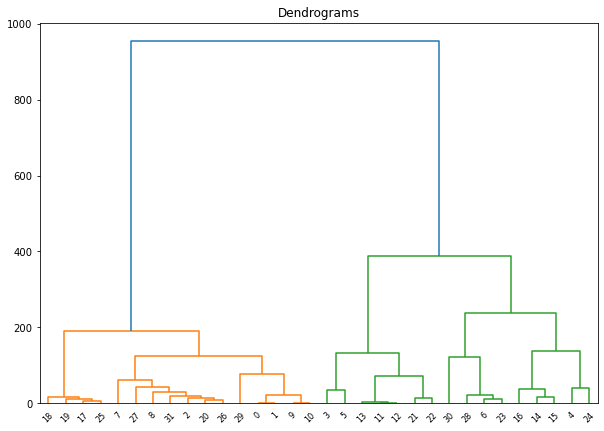

In [20]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward',metric='euclidean'))

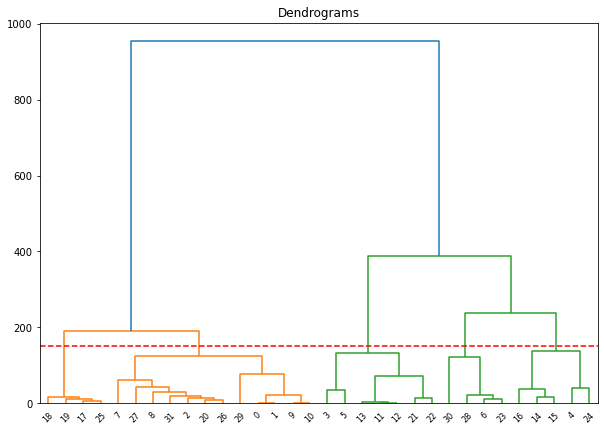

In [21]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=150, color='r', linestyle='--')

# Iris Hierarchical Clustering 

In [22]:
df=pd.read_excel("C:/Users/dax98/OneDrive/Desktop/INFO 6105 - DSEM/Week4/iris.xlsx")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
df=pd.get_dummies(df)

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
cluster.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [25]:
df['cluster']=cluster.fit_predict(df)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica,cluster
0,5.1,3.5,1.4,0.2,1,0,0,1
1,4.9,3.0,1.4,0.2,1,0,0,1
2,4.7,3.2,1.3,0.2,1,0,0,1
3,4.6,3.1,1.5,0.2,1,0,0,1
4,5.0,3.6,1.4,0.2,1,0,0,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


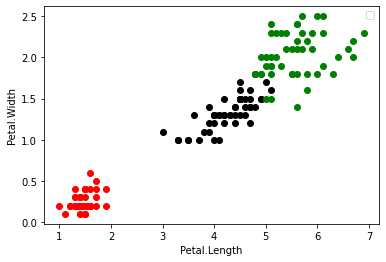

In [26]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]


plt.scatter(df0['Petal.Length'],df0['Petal.Width'],color='black')
plt.scatter(df1['Petal.Length'],df1['Petal.Width'],color='red')
plt.scatter(df2['Petal.Length'],df2['Petal.Width'],color='green')

plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()

# Circle

In [27]:
df=pd.read_excel("C:/Users/dax98/OneDrive/Desktop/INFO 6105 - DSEM/Week4/data.xlsx")
df.head()

,xv,yv,class
0,5.000000,0.003749,1
1,4.980973,0.398928,1
2,4.924039,0.593975,1
3,4.829629,1.174262,1
4,4.698463,1.769010,1


In [28]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
cluster.fit_predict(df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

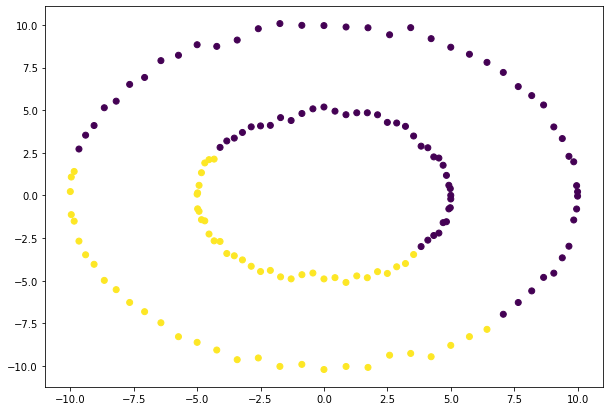

In [29]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['xv'], df['yv'], c=cluster.labels_) 

In [30]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
cluster.fit_predict(df)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

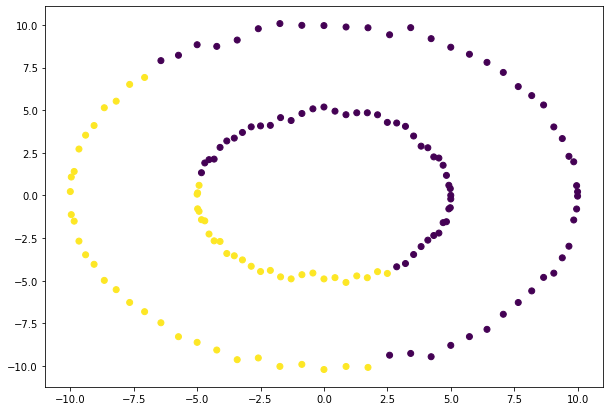

In [31]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['xv'], df['yv'], c=cluster.labels_) 

In [32]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')  
cluster.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

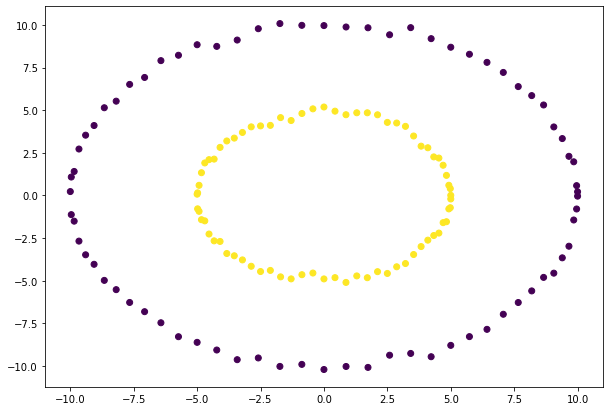

In [33]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['xv'], df['yv'], c=cluster.labels_)

In [34]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

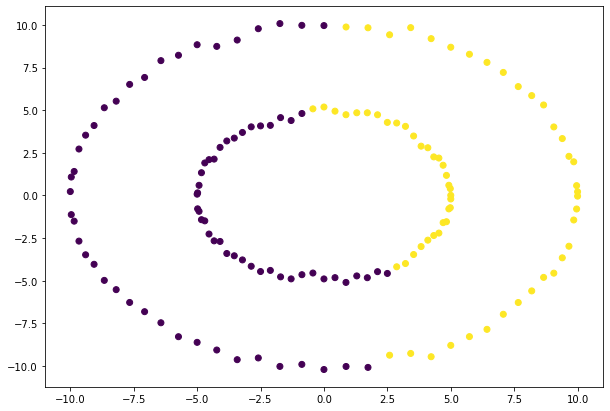

In [35]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['xv'], df['yv'], c=cluster.labels_)

# K means on Loan Dataset

In [38]:
df=pd.read_excel("C:/Users/dax98/OneDrive/Desktop/INFO 6105 - DSEM/Week1/loan.xlsx")
df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
X = df.drop('Decision',axis='columns')
y = df['Decision']

In [41]:
X

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,M,34.169998,2.750,owner,given,guard_etc,self_empl,2,0,t,given,232,200
425,F,22.250000,1.250,rent,not_given,unemploye,unemploye,3,0,f,given,280,0
426,M,23.330000,1.500,owner,given,creative_,governmen,1,0,f,given,422,200
427,M,21.000000,4.790,rent,not_given,productio,private_s,2,1,t,given,80,300


In [42]:
le_sex=LabelEncoder()
le_res_status=LabelEncoder()
le_occupation=LabelEncoder()
le_job_status=LabelEncoder()
le_liab_ref=LabelEncoder()
le_acc_ref=LabelEncoder()

In [43]:
X['Sex_n']=le_sex.fit_transform(X['Sex'])
X['Res_status_n']=le_res_status.fit_transform(X['Res_status'])
X['Occupation_n']=le_occupation.fit_transform(X['Occupation'])
X['Job_status_n']=le_job_status.fit_transform(X['Job_status'])
X['Liab_ref_n']=le_liab_ref.fit_transform(X['Liab_ref'])
X['Acc_ref_n']=le_acc_ref.fit_transform(X['Acc_ref'])

In [44]:
X

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Sex_n,Res_status_n,Occupation_n,Job_status_n,Liab_ref_n,Acc_ref_n
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,1,0,11,6,0,0
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,1,1,4,0,1,0
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,0,0,0,2,0,0
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,1,1,0,0,0,0
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,M,34.169998,2.750,owner,given,guard_etc,self_empl,2,0,t,given,232,200,1,0,3,4,1,0
425,F,22.250000,1.250,rent,not_given,unemploye,unemploye,3,0,f,given,280,0,0,1,11,6,0,0
426,M,23.330000,1.500,owner,given,creative_,governmen,1,0,f,given,422,200,1,0,0,0,0,0
427,M,21.000000,4.790,rent,not_given,productio,private_s,2,1,t,given,80,300,1,1,7,2,1,0


In [45]:
X = X.drop(['Sex','Res_status','Occupation','Job_status','Liab_ref','Acc_ref','Telephone'],axis='columns')

In [46]:
X

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Sex_n,Res_status_n,Occupation_n,Job_status_n,Liab_ref_n,Acc_ref_n
0,50.750000,0.585,0,0,145,0,1,0,11,6,0,0
1,19.670000,10.000,0,0,140,0,1,1,4,0,1,0
2,52.830002,15.000,5,14,0,2200,0,0,0,2,0,0
3,22.670000,2.540,2,0,0,0,1,1,0,0,0,0
4,29.250000,13.000,0,0,228,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
424,34.169998,2.750,2,0,232,200,1,0,3,4,1,0
425,22.250000,1.250,3,0,280,0,0,1,11,6,0,0
426,23.330000,1.500,1,0,422,200,1,0,0,0,0,0
427,21.000000,4.790,2,1,80,300,1,1,7,2,1,0


In [47]:
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [50]:
y_predicted = km.fit_predict(X[['Age','Time_at_address','Time_employed','Time_bank','Home_Expn','Balance','Sex_n','Res_status_n','Occupation_n','Job_status_n','Liab_ref_n','Acc_ref_n']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [52]:
df['cluster']=cluster.fit_predict(X)
df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision,cluster
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject,0
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject,0
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept,0
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept,0
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


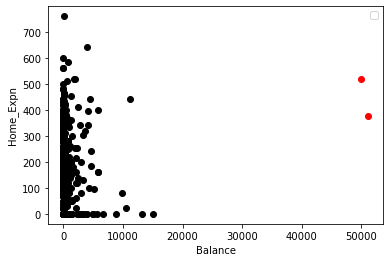

In [57]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]


plt.scatter(df0['Balance'],df0['Home_Expn'],color='black')
plt.scatter(df1['Balance'],df1['Home_Expn'],color='red')

plt.xlabel('Balance')
plt.ylabel('Home_Expn')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


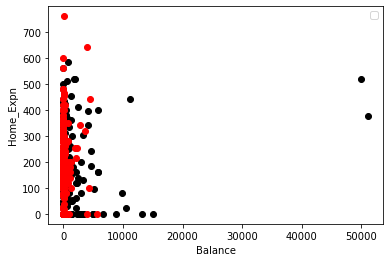

In [58]:
df0 = df[df.Decision=="accept"]
df1 = df[df.Decision=="reject"]


plt.scatter(df0['Balance'],df0['Home_Expn'],color='black')
plt.scatter(df1['Balance'],df1['Home_Expn'],color='red')

plt.xlabel('Balance')
plt.ylabel('Home_Expn')
plt.legend()